<center><h1><b>Project Title : Restaurant Reservation System</b></h1></center>
<h2><b>Purpose</b></h2>
<i>The purpose of the project is to analyze restaurant reservation data to optimize operations, enhance customer experience, improve marketing strategies, identify trends and opportunities, and benchmark performance. By leveraging insights from reservation patterns, such as peak times, customer preferences, and emerging trends, restaurants aim to optimize staffing, inventory management, and seating arrangements, tailor services to meet customer expectations, inform targeted marketing campaigns and promotions, adapt offerings to changing market dynamics, and evaluate performance against benchmarks for continuous improvement and sustainable success. </i>


### Step 0 : Downloading necessary packages

In [1]:
# !pip install mysql-connector-python
# !pip install pandas
# !pip install matplotlib

### Step 1 : Importing necessary packages

In [2]:
import mysql.connector  # Library for MySQL database connection
import pandas as pd  # Library for data manipulation and analysis
import matplotlib.pyplot as plt  # Library for data visualization

### Step 2 : Establishing Connection (Database connectivity from python to mysql database)

In [3]:
# Connecting to MySQL database using mysql-connector-python
connection = mysql.connector.connect(
user='root',
password='Keerthi@2001',
host='localhost',
database='restaurantreservationsystem'
)

### Step 3 : Data View

In [4]:
# Create a cursor object to execute SQL queries
cursor = connection.cursor()
# Query data from the 'restaurant' table
cursor.execute('SELECT * FROM restaurant')
#After fetching data from the database we are storing it into Pandas DataFrame
restaurant_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(restaurant_data.head())


   restaurant_id                  name       location   cuisine_type  \
0              1   The Flying Elephant  Vasanth Nagar  Multi-Cuisine   
1              2             Karavalli    Ashok Nagar        Coastal   
2              3      The Tao Terraces        MG Road      Pan-Asian   
3              4                 Ebony        MG Road         Indian   
4              5  Windmills Craftworks     Whitefield  Multi-Cuisine   

  contact_number  
0     9313218781  
1     8865890469  
2     7658266413  
3     8759853505  
4     8619752883  


In [5]:
# Query data from the 'customers' table
cursor.execute('SELECT * FROM customers')
# Fetch the data from the cursor and store it into a Pandas DataFrame
customer_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(customer_data.head())

   CustomerID FirstName LastName                   Email PhoneNumber
0           1     Amara    Russo    AmaraRusso@gmail.com  8869414286
1           2     Jamie   Suarez     JamieSuarez@aol.com  9022110397
2           3    Jimena   Butler  JimenaButler@yahoo.com  9261557810
3           4     Ryder    Wells  RyderWells@outlook.com  7318255276
4           5   Cecilia    Barry  CeciliaBarry@gmail.com  9848037174


In [6]:
# Query data from the 'tables' table
cursor.execute('SELECT * FROM tables')
#After fetching data from the database we are storing it into Pandas DataFrame
tables_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(tables_data.head())

   table_id  restaurant_id  table_number  seating_capacity         status
0         1             11           133                 2  Not Available
1         2             27           132                 4      Available
2         3              1           106                 4  Not Available
3         4             23           141                 8  Not Available
4         5             27           106                 6      Available


In [7]:
# Query data from the 'reservation' table
cursor.execute('SELECT * FROM reservation')
#After fetching data from the database we are storing it into Pandas DataFrame
reservation_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(reservation_data.head())

   reservation_id  customer_id  restaurant_id  table_id ReservationDate  \
0               1           35             20        80      2023-05-18   
1               2           69             38        18      2023-05-01   
2               3           45             40        67      2023-05-01   
3               4           68             44         1      2023-06-21   
4               5           75              2        15      2023-06-04   

  ReservationTime  NumberOfGuests     Status        SpecialRequests  
0 0 days 18:15:00               8  Confirmed  Higher chair for kids  
1 0 days 13:45:00               2  Cancelled            Anniversary  
2 0 days 10:45:00               6  Cancelled            Anniversary  
3 0 days 22:30:00               8  Cancelled  Higher chair for kids  
4 0 days 20:00:00               4  Cancelled            Window Seat  


In [8]:
# Query data from the 'orders' table
cursor.execute('SELECT * FROM orders')
#After fetching data from the database we are storing it into Pandas DataFrame
orders_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(orders_data.head())

   OrderID  ReservationID   OrderDate TotalAmount OrderStatus   PaymentMethod
0        1             37  2023-04-28      221.00   Completed            Cash
1        2             49  2023-06-23      968.00     Pending            Cash
2        3             15  2023-05-26      622.00   Completed  Mobile Payment
3        4             66  2023-06-21      603.00     Pending  Mobile Payment
4        5              5  2023-04-04      848.00   Completed  Mobile Payment


In [9]:
# Query data from the 'payments' table
cursor.execute('SELECT * FROM payments')
#After fetching data from the database we are storing it into Pandas DataFrame
payments_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(payments_data.head())

   PaymentID  OrderID PaymentDate  Amount     PaymentType PaymentStatus
0          1       64  2023-04-28  221.00            Cash     Completed
1          2       77  2023-06-23  968.00            Cash       Pending
2          3       20  2023-05-26  622.00  Mobile Payment     Completed
3          4       38  2023-06-21  603.00  Mobile Payment       Pending
4          5       94  2023-04-04  848.00  Mobile Payment     Completed


In [10]:
# Query data from the 'review' table
cursor.execute('SELECT * FROM review')
#After fetching data from the database we are storing it into Pandas DataFrame
review_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in
cursor.description])
# Print the first few rows of the DataFrame to verify the data
print(review_data.head())

   review_id  restaurant_id  customer_id  rating  \
0          1             25           98       5   
1          2             23           79       3   
2          3             14           87       4   
3          4             28           61       2   
4          5             50           89       5   

                                             Comment  
0  The food was amazing, and the service was exce...  
1      Great ambiance, but the food was a bit salty.  
2  I loved the dessert, but the main course was a...  
3           Service was slow, and the food was cold.  
4  Absolutely fantastic experience! Will come again.  


In [11]:
# Printing the summary statistics of the DataFrame 'reservation_data'
print(reservation_data.describe())

       reservation_id  customer_id  restaurant_id    table_id  \
count      100.000000   100.000000     100.000000  100.000000   
mean        50.500000    50.720000      26.320000   50.360000   
std         29.011492    27.058515      13.809585   28.134425   
min          1.000000     1.000000       2.000000    1.000000   
25%         25.750000    30.250000      16.000000   25.000000   
50%         50.500000    51.000000      28.500000   53.500000   
75%         75.250000    70.000000      38.000000   71.750000   
max        100.000000   100.000000      49.000000   99.000000   

                 ReservationTime  NumberOfGuests  
count                        100       100.00000  
mean             0 days 17:22:03         4.94000  
std    0 days 03:54:54.169974593         2.35196  
min              0 days 10:00:00         2.00000  
25%              0 days 13:45:00         2.00000  
50%              0 days 17:37:30         4.00000  
75%              0 days 20:30:00         8.00000  
max   

&nbsp;
## Step 4 : Data Cleaning

In [12]:
# Check for missing values in the DataFrame and sum them up column-wise
# Then print the sum of missing values for each column
print("Restaurants\n----------")
print(restaurant_data.isnull().sum())
print("\nCustomers\n----------")
print(customer_data.isnull().sum())
print("\nTables\n----------")
print(tables_data.isnull().sum())
print("\nReservations\n----------")
print(reservation_data.isnull().sum())
print("\nOrders\n----------")
print(orders_data.isnull().sum())
print("\nPayments\n----------")
print(payments_data.isnull().sum())
print("\nReviews\n----------")
print(review_data.isnull().sum())


Restaurants
----------
restaurant_id     0
name              0
location          0
cuisine_type      0
contact_number    0
dtype: int64

Customers
----------
CustomerID     0
FirstName      0
LastName       0
Email          0
PhoneNumber    0
dtype: int64

Tables
----------
table_id            0
restaurant_id       0
table_number        0
seating_capacity    0
status              0
dtype: int64

Reservations
----------
reservation_id     0
customer_id        0
restaurant_id      0
table_id           0
ReservationDate    0
ReservationTime    0
NumberOfGuests     0
Status             0
SpecialRequests    0
dtype: int64

Orders
----------
OrderID          0
ReservationID    0
OrderDate        0
TotalAmount      0
OrderStatus      0
PaymentMethod    0
dtype: int64

Payments
----------
PaymentID        0
OrderID          0
PaymentDate      0
Amount           0
PaymentType      0
PaymentStatus    0
dtype: int64

Reviews
----------
review_id        0
restaurant_id    0
customer_id      0
rati

In [13]:
# Drop rows with any missing values (NaN) from the dataframe
restaurant_data.dropna(inplace=True)
customer_data.dropna(inplace=True)
tables_data.dropna(inplace=True)
reservation_data.dropna(inplace=True)
orders_data.dropna(inplace=True)
payments_data.dropna(inplace=True)
review_data.dropna(inplace=True)


In [14]:
# Print the number of duplicate rows in the DataFrame
print(restaurant_data.duplicated().sum())
print(customer_data.duplicated().sum())
print(tables_data.duplicated().sum())
print(reservation_data.duplicated().sum())
print(orders_data.duplicated().sum())
print(payments_data.duplicated().sum())
print(review_data.duplicated().sum())

0
0
0
0
0
0
0


## Step 4 : Query Execution

In [15]:
# Execute SQL query to join data from multiple tables (restaurant, reservation, and orders)
cursor.execute('SELECT rt.restaurant_id, rt.name, rs.reservation_id, o.orderid FROM restaurant rt LEFT JOIN reservation rs ON rt.restaurant_id = rs.restaurant_id LEFT JOIN orders o ON rs.reservation_id=o.reservationid')

# Fetch the data and store it into a Pandas DataFrame
union_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Convert DataFrame to a DataFrame object
union_data = pd.DataFrame(union_data)

# Group the data by restaurant name and aggregate counts of reservations and orders
grouped_data = union_data.groupby('name').agg({
    'reservation_id': 'count',  # Count of reservations
    'orderid': 'count'          # Count of orders
}).reset_index()

# Rename columns for clarity
grouped_data.columns = ['restaurant_name', 'reservation_count', 'order_count']

# Sort the DataFrame by restaurant name
grouped_data = grouped_data.sort_values('restaurant_name')
# Filter out rows where both reservation count and order count are not zero
grouped_data = grouped_data[(grouped_data['reservation_count'] != 0) & (grouped_data['order_count'] != 0)]
# Print the grouped and aggregated data
print(grouped_data)


                restaurant_name  reservation_count  order_count
1             Absolute Barbecue                  4            4
4         Arbor Brewing Company                  7            5
6                   Banana Leaf                  4            4
7               Barbeque Nation                  7            5
9          Brahmin's Coffee Bar                  2            2
13                    Café Noir                  1            1
15                Chutney Chang                  4            2
16       Corner House Ice Cream                  1            1
22       Dum Pukht Jolly Nabobs                  3            2
24       Ebony Fine-Dine & Café                  3            2
26            Empire Restaurant                  3            3
29               Hard Rock Cafe                  3            2
30            High Ultra Lounge                  1            1
35                    Karavalli                  5            4
39          Le Cirque Signature         

In [16]:
# Count the number of reservations for each restaurant and store the result in a Series
reservations_per_restaurant = reservation_data['restaurant_id'].value_counts()

# Print the number of reservations for each restaurant
print(reservations_per_restaurant)


restaurant_id
42    6
16    5
34    5
2     4
29    4
20    3
31    3
30    3
28    3
11    3
36    3
38    3
9     3
43    3
25    3
40    3
44    3
48    2
12    2
21    2
6     2
18    2
41    2
22    2
35    2
17    2
5     2
47    2
10    2
23    2
45    2
3     2
7     1
32    1
37    1
8     1
26    1
33    1
4     1
24    1
15    1
49    1
Name: count, dtype: int64


In [17]:
# Sort the DataFrame 'tables_data' by the 'seating_capacity' column in ascending order
tables_data.sort_values(by='seating_capacity', ascending=True)


,table_id,restaurant_id,table_number,seating_capacity,status
0,1,11,133,2,Not Available
27,28,42,133,2,Not Available
37,38,35,109,2,Available
41,42,29,130,2,Not Available
43,44,1,102,2,Not Available
...,...,...,...,...,...
54,55,4,127,8,Available
72,73,17,135,8,Not Available
62,63,46,132,8,Available
87,88,1,108,8,Available


In [18]:
# Filter reservation_data DataFrame to include only rows where the 'Status' column is 'Confirmed'
confirmed_status = reservation_data[reservation_data['Status'] == 'Confirmed']

# Print the DataFrame containing only reservations with 'Confirmed' status
print(confirmed_status)

# Print the total number of rows (reservations) in the confirmed_status DataFrame
print(f"\n\nTotal number of confirmed status is {confirmed_status['reservation_id'].count()}\n\n")


    reservation_id  customer_id  restaurant_id  table_id ReservationDate  \
0                1           35             20        80      2023-05-18   
6                7           15             41        49      2023-05-04   
7                8           37             34        42      2023-06-08   
9               10           75             10        91      2023-05-31   
13              14            5             31        58      2023-06-04   
14              15           48             29        74      2023-05-30   
15              16           72             48        68      2023-06-28   
20              21           64             34        14      2023-06-10   
22              23            1              9        65      2023-06-13   
24              25           93              2        46      2023-06-12   
25              26            9             45        38      2023-05-05   
26              27           52             23        89      2023-06-01   
30          

In [19]:
# Count the occurrences of each cuisine type in the 'cuisine_type' column
popular_cuisine_types = restaurant_data['cuisine_type'].value_counts()

# Print a message indicating that the following output represents the most popular cuisine types
print("Most popular cuisine types:")

# Print the counts of each cuisine type, sorted in descending order
print(popular_cuisine_types)


Most popular cuisine types:
cuisine_type
Indian            9
Chinese           9
North Indian      8
Italian           6
South Indian      5
Multi-Cuisine     4
Fast Food         4
Middle Eastern    4
Japanese          4
Barbecue          3
Mexican           3
Hyderabadi        3
Healthy           3
American          3
Andhra            2
Mughlai           2
BBQ               2
Coastal           2
Asian Fusion      2
Brewery           2
European          2
Rajasthani        1
Seafood           1
Vegetarian        1
Steakhouse        1
Pan-Asian         1
Thai              1
Kerala            1
Sweets            1
Awadhi            1
Ice Cream         1
Bar               1
Pub               1
Malaysian         1
Cafe              1
Dim Sum           1
French            1
Mediterranean     1
Desserts          1
Name: count, dtype: int64


In [20]:
# Count the number of reservations for each status and store the result in a Series
reservations_per_status = reservation_data['Status'].value_counts()

# Print a descriptive message indicating that we are displaying the total number of reservations per status
print("Total number of reservations per status:")

# Print the Series containing the count of reservations for each status
print(reservations_per_status)


Total number of reservations per status:
Status
Confirmed    45
Cancelled    31
Completed    24
Name: count, dtype: int64


## Data Visualization

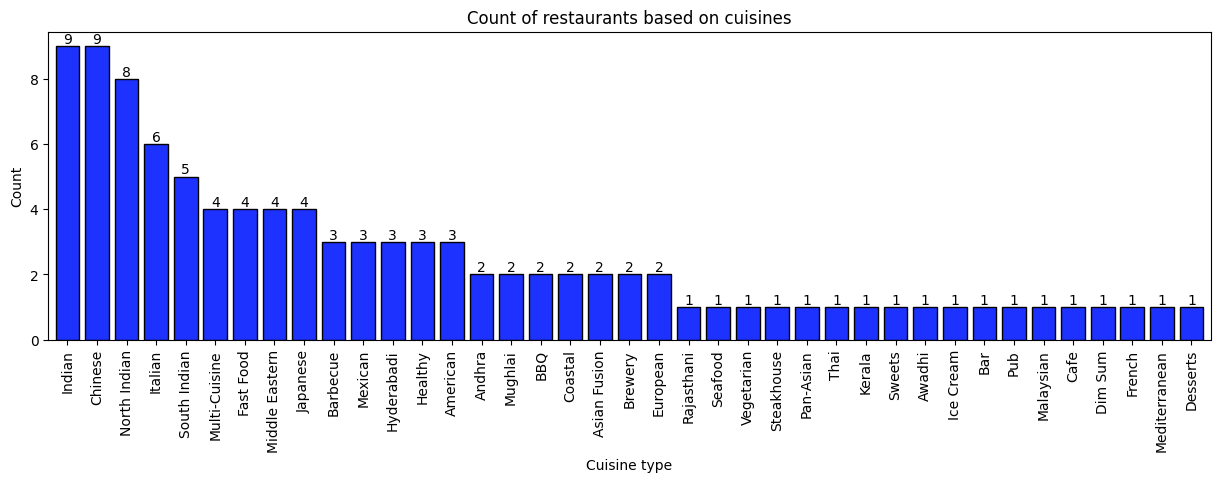

In [21]:
# Create a new figure with a specific size (width=10, height=4)
plt.figure(figsize=(15, 4))

# Create a bar plot showing the count of restaurants based on cuisine types
ax = restaurant_data['cuisine_type'].value_counts().plot(kind='bar',color='#1D32FF',fontsize=10,edgecolor='black',width=0.8)

# Set the x-axis label
plt.xlabel('Cuisine type')
# Set the y-axis label
plt.ylabel('Count')
# Set the title of the plot
plt.title('Count of restaurants based on cuisines')

# Add text labels to each bar indicating its count
for i, count in enumerate(restaurant_data['cuisine_type'].value_counts()):
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


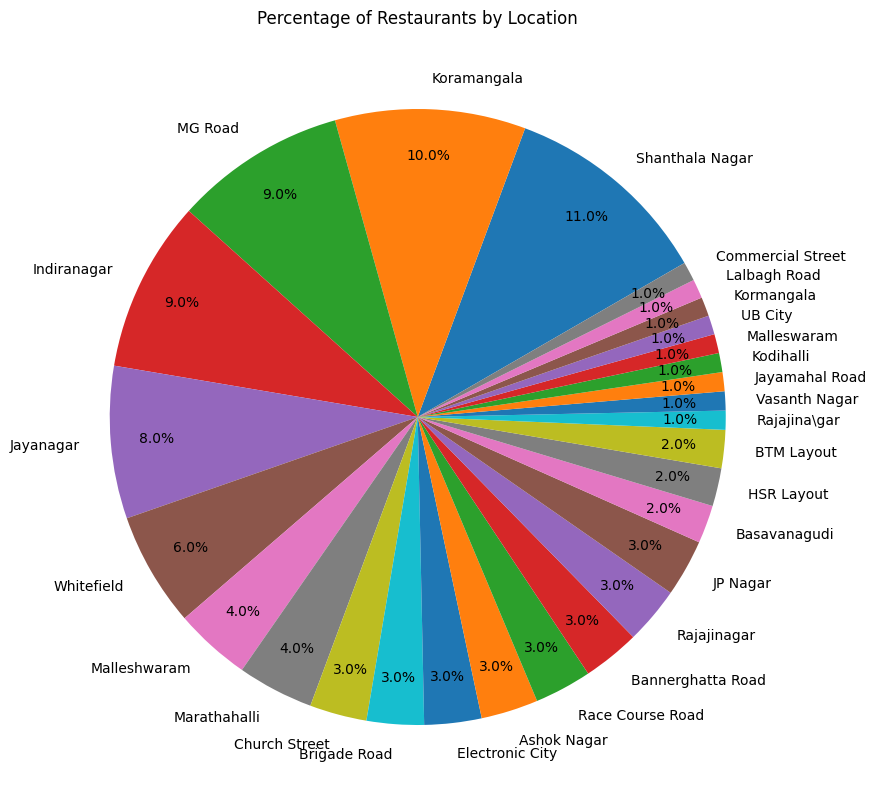

In [22]:
# Pie chart for percentage of restaurants by location
location_counts = restaurant_data['location'].value_counts()  # Count the occurrences of each location
plt.figure(figsize=(10,10))  # Set the figure size to 6x6 inches
patches, texts, autotexts = plt.pie(location_counts.values, labels=location_counts.index, startangle=30,autopct='%1.1f%%', pctdistance=0.85) 
plt.title('Percentage of Restaurants by Location')  # Set the title of the chart
# Display the chart
plt.show() 

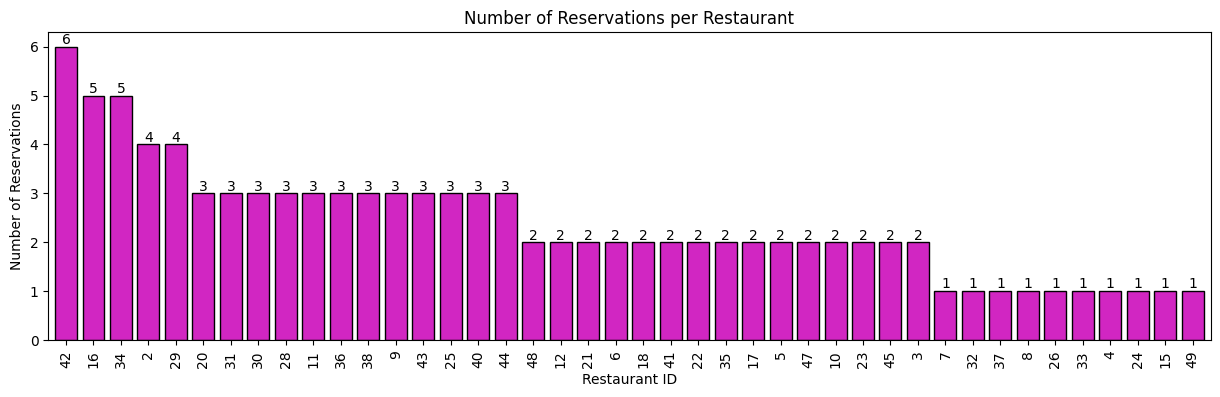

In [23]:
# Set the size of the figure to 10 inches in width and 6 inches in height
plt.figure(figsize=(15,4))

# Plot the data using a bar plot, assigning the returned axes object to the variable 'ax'
ax = reservations_per_restaurant.plot(kind='bar',color='#D126C2',fontsize=10,edgecolor='black',width=0.8)
# Set the title of the plot
plt.title('Number of Reservations per Restaurant')
# Set the label for the x-axis
plt.xlabel('Restaurant ID')
# Set the label for the y-axis
plt.ylabel('Number of Reservations')

# Add text labels on top of each bar in the bar plot
for i, count in enumerate(reservations_per_restaurant):
    # Add text at the coordinates (i, count), with the count value converted to a string
    ax.text(i, count, str(count), ha='center', va='bottom')

# Display the plot
plt.show()


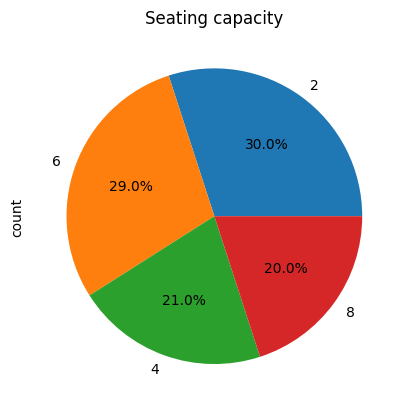

In [24]:
# Plot a pie chart of the seating capacity distribution
tables_data['seating_capacity'].value_counts().plot(kind='pie', autopct='%1.1f%%')

# Set the title of the plot
plt.title("Seating capacity")

# Display the plot
plt.show()

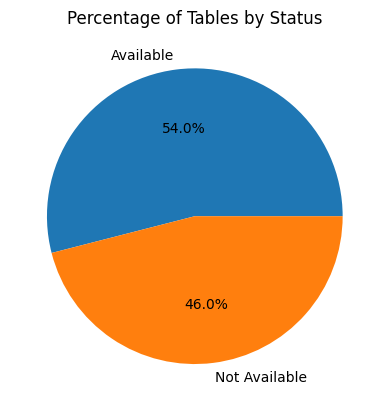

In [25]:
# Count the occurrences of each unique value in the 'status' column of the 'tables_data' DataFrame
status_counts = tables_data['status'].value_counts()

# Display the percentage of each wedge as a label with one decimal point
plt.pie(status_counts.values, labels=status_counts.index, autopct='%1.1f%%')
# Set the title of the pie chart
plt.title('Percentage of Tables by Status')

# Display the pie chart
plt.show()

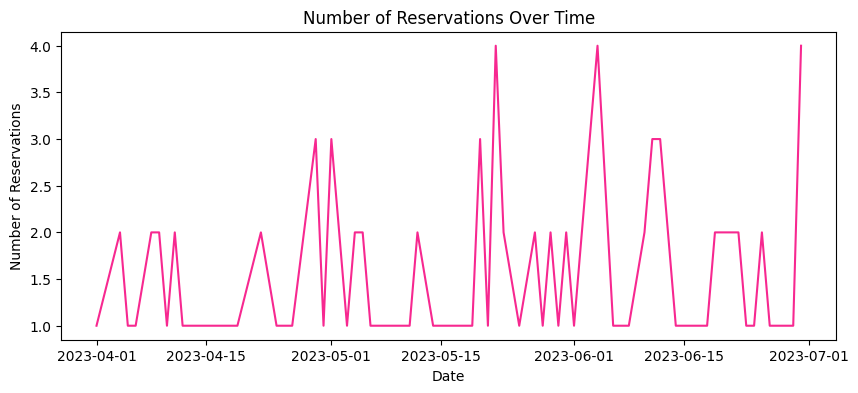

In [26]:
# Convert the 'ReservationDate' column to datetime format using pandas
reservation_dates = pd.to_datetime(reservation_data['ReservationDate'])

# Count the number of reservations for each date and sort the results by date
reservation_counts = reservation_dates.value_counts().sort_index()

plt.figure(figsize=(10, 4))
# Plot the number of reservations over time
plt.plot(reservation_counts.index, reservation_counts.values,color="#F72890")
# Add label to the x-axis
plt.xlabel('Date')
# Add label to the y-axis
plt.ylabel('Number of Reservations')
# Add title to the plot
plt.title('Number of Reservations Over Time')
# Display the plot
plt.show()


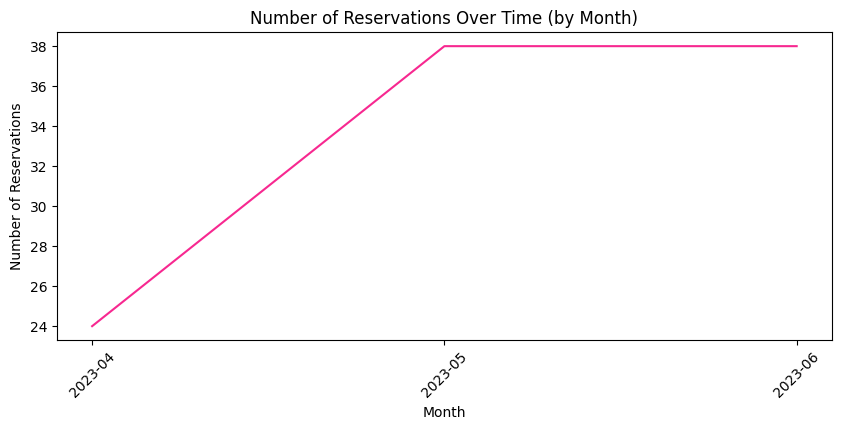

In [27]:
# Convert the 'ReservationDate' column to datetime format
reservation_data['ReservationDate'] = pd.to_datetime(reservation_data['ReservationDate'])

# Group by month and count the number of reservations for each month
monthly_reservations = reservation_data['ReservationDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 4))
# Plot the number of reservations over time by month
plt.plot(monthly_reservations.index.astype(str), monthly_reservations.values, color="#F72890")
# Add label to the x-axis
plt.xlabel('Month')
# Add label to the y-axis
plt.ylabel('Number of Reservations')
# Add title to the plot
plt.title('Number of Reservations Over Time (by Month)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()


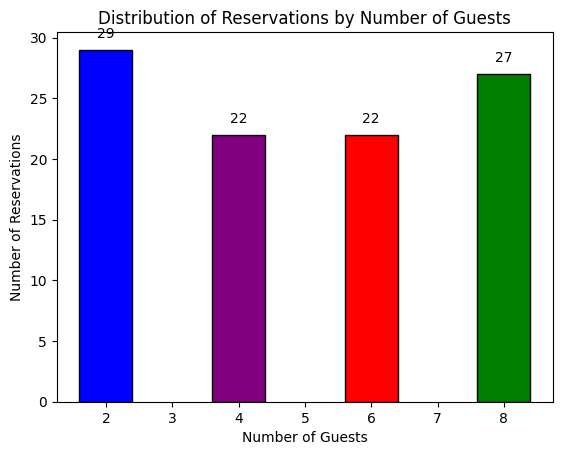

In [28]:
# Count the number of reservations for each number of guests
guest_counts = reservation_data['NumberOfGuests'].value_counts()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']  

# Create a bar chart to visualize the distribution of reservations by number of guests
plt.bar(guest_counts.index, guest_counts.values, color=colors,edgecolor='black')
# Set the x-axis label
plt.xlabel('Number of Guests')
# Set the y-axis label
plt.ylabel('Number of Reservations')
# Set the title of the plot
plt.title('Distribution of Reservations by Number of Guests')

# Add numbers on top of each bar to display the count of reservations
for i, value in enumerate(guest_counts.values):
    plt.text(guest_counts.index[i], value + 1, str(value), ha='center')

# Display the plot
plt.show()



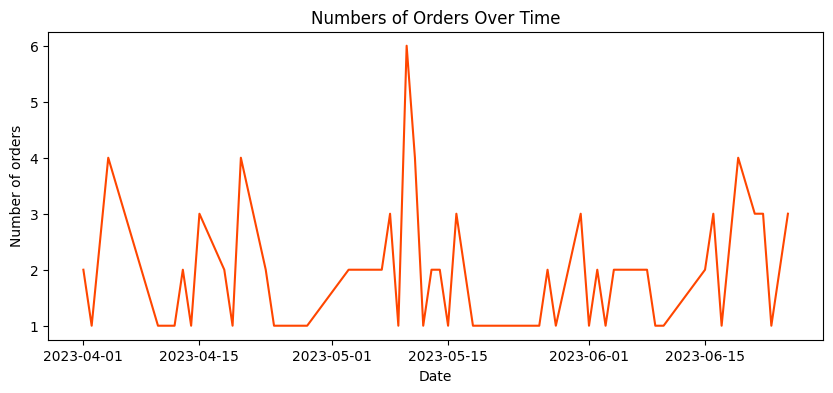

In [29]:
# Convert the 'OrderDate' column to datetime format
order_dates = pd.to_datetime(orders_data['OrderDate'])

orders_counts = order_dates.value_counts().sort_index()
plt.figure(figsize=(10,4))
# Plot the total amount of orders over time
plt.plot(orders_counts.index, orders_counts.values,color='#FF4600')
# Label the x-axis as 'Date'
plt.xlabel('Date')
# Label the y-axis as 'Total Amount'
plt.ylabel('Number of orders')
# Set the title of the plot
plt.title('Numbers of Orders Over Time')
# Display the plot
plt.show()


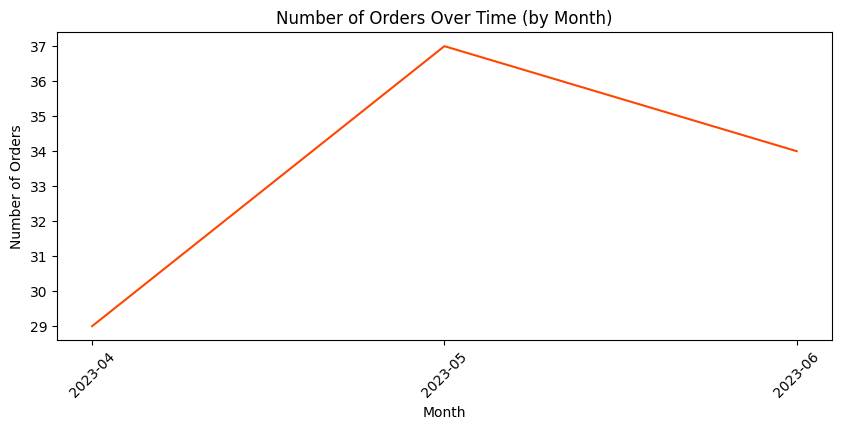

In [30]:
# Convert the 'OrderDate' column to datetime format
orders_data['OrderDate'] = pd.to_datetime(orders_data['OrderDate'])

# Group by month and count the number of orders for each month
monthly_orders = orders_data['OrderDate'].dt.to_period('M').value_counts().sort_index()

plt.figure(figsize=(10, 4))
# Plot the number of orders over time by month
plt.plot(monthly_orders.index.astype(str), monthly_orders.values, color="#FF4600")
# Add label to the x-axis
plt.xlabel('Month')
# Add label to the y-axis
plt.ylabel('Number of Orders')
# Add title to the plot
plt.title('Number of Orders Over Time (by Month)')
# Rotate x-axis labels for better readability
plt.xticks(rotation=45)
# Display the plot
plt.show()


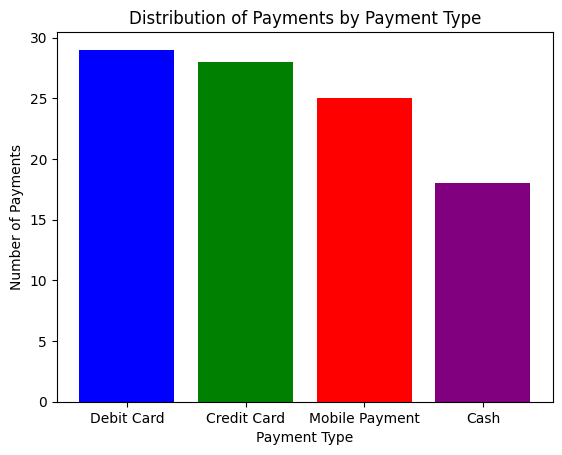

In [31]:
# Calculate the counts of each payment type in the payments_data DataFrame
payment_type_counts = payments_data['PaymentType'].value_counts()

colors = ['blue', 'green', 'red', 'purple', 'orange', 'yellow']  
# Plot a bar chart with payment type on the x-axis and the count of payments on the y-axis
plt.bar(payment_type_counts.index, payment_type_counts.values,color=colors)
# Add label for x-axis
plt.xlabel('Payment Type')
# Add label for y-axis
plt.ylabel('Number of Payments')
# Add title to the plot
plt.title('Distribution of Payments by Payment Type')
# Display the plot
plt.show()


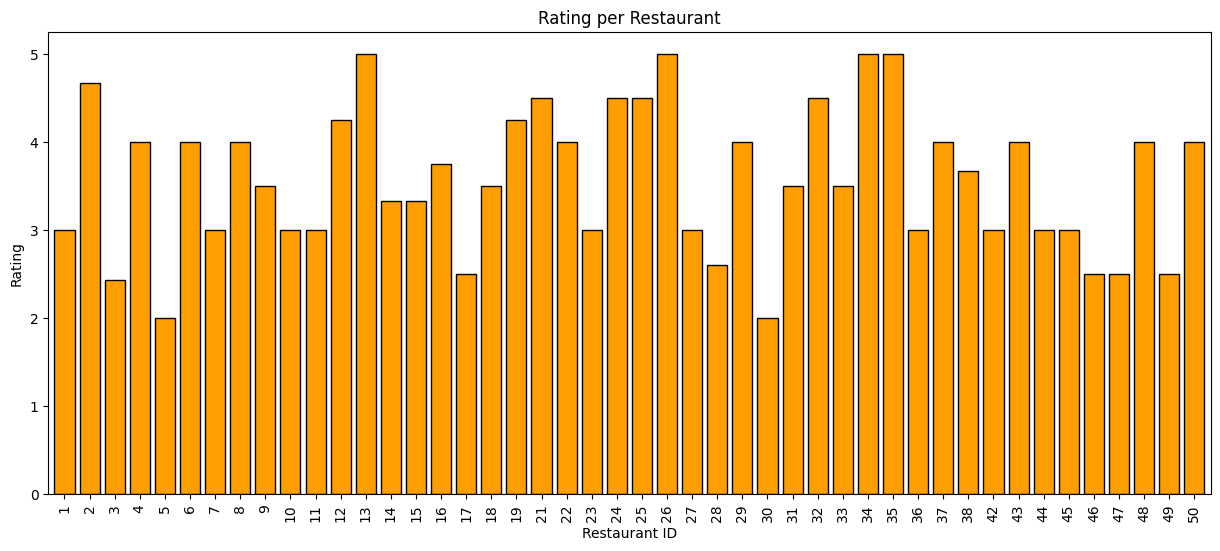

In [32]:
# Calculate the mean rating for each restaurant by grouping the review_data DataFrame by 'restaurant_id'
rating_per_restaurant = review_data.groupby('restaurant_id')['rating'].mean()

# Create a new figure for the plot with a specified size
plt.figure(figsize=(15, 6))

# Plot the mean ratings for each restaurant as a bar chart
rating_per_restaurant.plot(kind='bar',color='#FF9E00',edgecolor='black',width=0.8)

# Set the title of the plot
plt.title('Rating per Restaurant')
# Set the label for the x-axis
plt.xlabel('Restaurant ID')
# Set the label for the y-axis
plt.ylabel('Rating')

# Display the plot
plt.show()


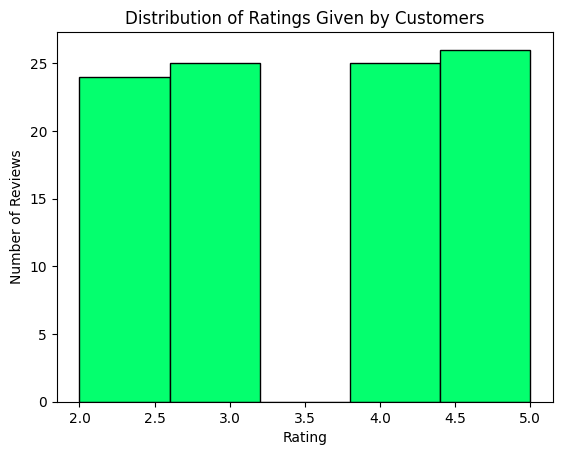

In [33]:
# Plot a histogram of the ratings from the review_data DataFrame
plt.hist(review_data['rating'], bins=5, edgecolor='black',color='#04FF6E')

# Set the label for the x-axis
plt.xlabel('Rating')
# Set the label for the y-axis
plt.ylabel('Number of Reviews')
# Set the title of the histogram
plt.title('Distribution of Ratings Given by Customers')

# Display the histogram
plt.show()


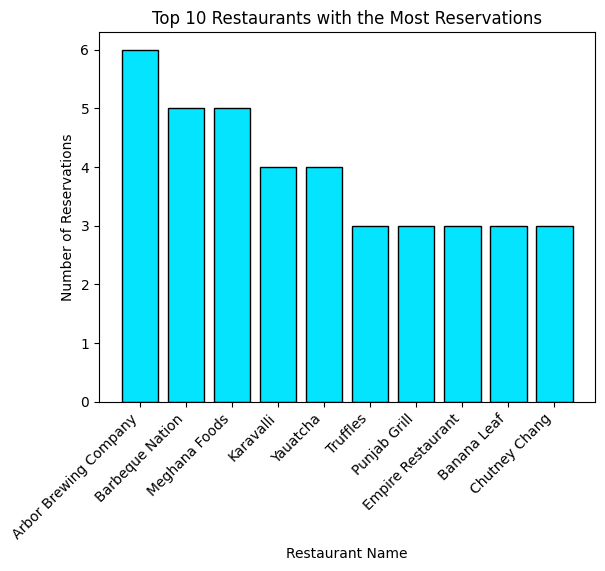

In [34]:
# Execute the SQL query to retrieve data from the database
cursor.execute('SELECT rt.restaurant_id, rt.name, COUNT(rs.restaurant_id) AS reservation_count FROM restaurant rt INNER JOIN reservation rs ON rt.restaurant_id = rs.restaurant_id GROUP BY rt.restaurant_id, rt.name')

# Fetch the data and store it into Pandas DataFrame
rr_data = pd.DataFrame(cursor.fetchall(), columns=[desc[0] for desc in cursor.description])

# Sort the DataFrame by reservation_count in descending order and select the top 10 restaurants
top_restaurants_with_names = rr_data.nlargest(10, 'reservation_count')

# Plotting the bar chart
plt.bar(top_restaurants_with_names['name'], top_restaurants_with_names['reservation_count'],color='#04E4FF',edgecolor='black')
plt.xlabel('Restaurant Name')
plt.ylabel('Number of Reservations')
plt.title('Top 10 Restaurants with the Most Reservations')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.show()


&nbsp;
## Conclusion

- Indian cuisine dominates the restaurant scene with the highest count among all cuisines, indicating its popularity among customers.
- Shanthala Nagar emerges as the top location with 11% of the restaurants, closely followed by Koramangala at 10%. This suggests that these areas are hotspots for dining establishments.
- Restaurant ID 42 stands out with the highest number of reservations, indicating its popularity or efficient reservation system compared to others.
- Establishments with 2 seating capacities are most prevalent, followed by those with a capacity for 6, suggesting that smaller and moderately-sized restaurants are more common.
- Reservations show a notable increase from April to May, indicating a surge in dining activity during this period. However, the trend appears to stabilize from May to June, indicating consistent reservation patterns.
- Similar to reservations, orders exhibit an increase from April to May, suggesting heightened dining demand during this time. However, there is a slight decrease in orders from May to June, indicating a potential seasonal or temporal factor affecting dining habits.
- Debit card payments emerge as the preferred payment method, indicating a preference for cashless transactions among customers. This highlights the importance of accepting various payment methods to cater to customer preferences and enhance convenience.
